In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Scatter plots for data exploration

In [17]:
race =  pd.read_csv('data/race_county_data/cleaned_georgia_race_county.csv', index_col = 0)
polling_site = pd.read_csv('data/polling_site_data/2020_clean_county_densities.csv', index_col = 0)
polling_site_changes = pd.read_csv('data/polling_site_data/polling_sites_in_years_changes.csv', index_col = 0)

In [18]:
race.head()

,Area Name,id,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others
0,"Appling County, Georgia",0500000US13001,18444,1825,12674,3339,123,417,66,0.098948,0.687161,0.181034,0.006669,0.022609,0.003578
1,"Atkinson County, Georgia",0500000US13003,8286,2048,4801,1208,12,167,50,0.247164,0.579411,0.145788,0.001448,0.020154,0.006034
2,"Bacon County, Georgia",0500000US13005,11140,875,8103,1747,40,335,40,0.078546,0.727379,0.156822,0.003591,0.030072,0.003591
3,"Baker County, Georgia",0500000US13007,2876,143,1514,1128,18,70,3,0.049722,0.526426,0.392211,0.006259,0.024339,0.001043
4,"Baldwin County, Georgia",0500000US13009,43799,1139,22432,18318,599,1027,284,0.026005,0.512158,0.418229,0.013676,0.023448,0.006484


In [19]:
polling_site.head()

,County,2020 Quantity,Total Population,Polling Site Density
0,Fulton,394,1066710,0.000369
1,Dekalb,193,764382,0.000252
2,Gwinnett,156,957062,0.000163
3,Cobb,145,766149,0.000189
4,Chatham,92,295291,0.000312


In [20]:
polling_site_changes.head()

,County,2016 Quantity,2018 Quantity,2020 Quantity,Delta 18-20,Delta 16-18,Delta 16-20
0,Fulton,364,382,394,12,18,30
1,Dekalb,191,191,193,2,0,2
2,Gwinnett,156,156,156,0,0,0
3,Cobb,145,141,145,4,-4,0
4,Chatham,89,90,92,2,1,3


Since the polling site and polling site changes data does not include race, the dataframes have to be merged.

Checking the number of rows to ensure that all rows are preserved after the merger.

In [21]:
print(race.shape)
print(polling_site.shape)
print(polling_site_changes.shape)

(159, 15)
(159, 4)
(159, 7)


Since the county names in the race data are have 'County, Georgia' while the polling site data only has the county name, this part of the string is removed and all data is converted to titles.

In [22]:
race['Area Name'] = race['Area Name'].str.replace(' County, Georgia','')
race['Area Name'] = race['Area Name'].str.title()

polling_site['County'] = polling_site['County'].str.title()
polling_site_changes['County'] = polling_site['County'].str.title()

In [23]:
polling_site = pd.merge(race, polling_site, how="inner", left_on=['Area Name'], right_on=['County'])
polling_site_changes = pd.merge(race, polling_site_changes, how="inner", left_on=['Area Name'], right_on=['County'])

In [24]:
polling_site.head()

,Area Name,id,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,County,2020 Quantity,Total Population,Polling Site Density
0,Appling,0500000US13001,18444,1825,12674,3339,123,417,66,0.098948,0.687161,0.181034,0.006669,0.022609,0.003578,Appling,9,18444,0.000488
1,Atkinson,0500000US13003,8286,2048,4801,1208,12,167,50,0.247164,0.579411,0.145788,0.001448,0.020154,0.006034,Atkinson,4,8286,0.000483
2,Bacon,0500000US13005,11140,875,8103,1747,40,335,40,0.078546,0.727379,0.156822,0.003591,0.030072,0.003591,Bacon,1,11140,0.000090
3,Baker,0500000US13007,2876,143,1514,1128,18,70,3,0.049722,0.526426,0.392211,0.006259,0.024339,0.001043,Baker,5,2876,0.001739
4,Baldwin,0500000US13009,43799,1139,22432,18318,599,1027,284,0.026005,0.512158,0.418229,0.013676,0.023448,0.006484,Baldwin,14,43799,0.000320


In [ ]:
polling_site_changes.head()

In [25]:
print(polling_site.shape)
print(polling_site_changes.shape)

(159, 19)


In [32]:
# Function to create scatter plots of polling site quantity
def scatterplot_quantity(race):
    polling_site.plot.scatter(x='Population Density: ' + str(race), y='2020 Quantity', s = 10, c = 'brown')
    plt.ylabel('2020 Polling \nQuantity', rotation=0, ha="right")
    plt.savefig('images/scatter_plot_quantity' +str(race))

# Function to create scatter plots of polling site density
def scatterplot_density(race):
    polling_site.plot.scatter(x='Population Density: ' + str(race), y='Polling Site Density', s = 10, c = 'brown', )
    plt.ylabel('Polling Site \nDensity', rotation=0, ha="right")
    plt.savefig('images/scatter_plot_density_' +str(race))

# Function to create scatter plots of changes in polling site by county
def scatterplot_changes(race, year):
    polling_site_changes.plot.scatter(x='Population Density: ' + str(race), y='Delta ' + str(year), s = 10, c = 'brown', )
    plt.ylabel('Changes in \nthe Number of \nPolling sites', rotation=0, ha="right")
    plt.savefig('images/scatter_plot_changes_' +str(year) + '_' + str(race))


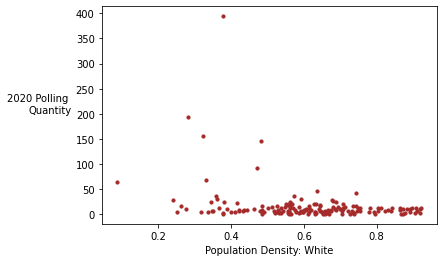

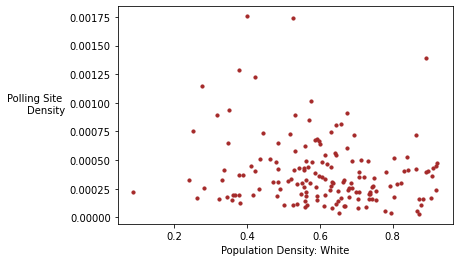

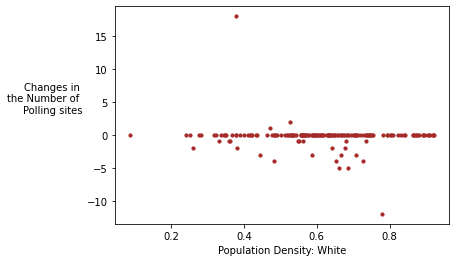

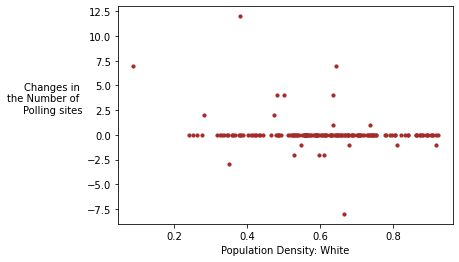

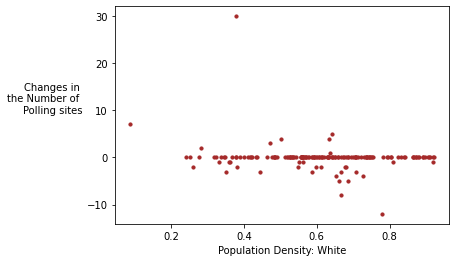

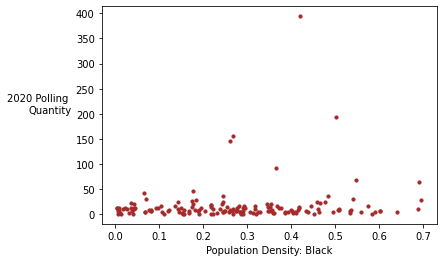

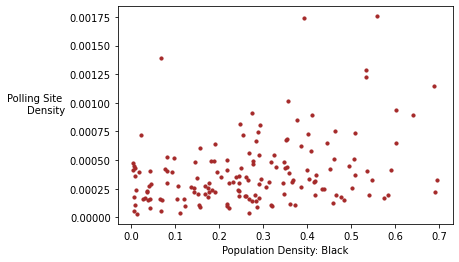

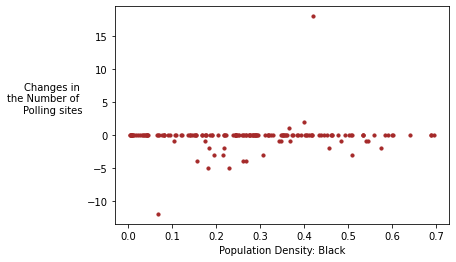

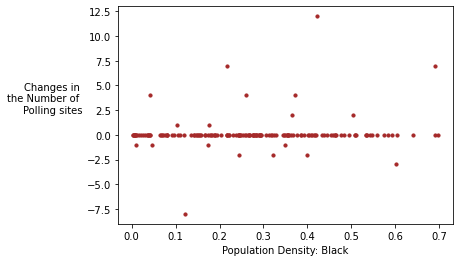

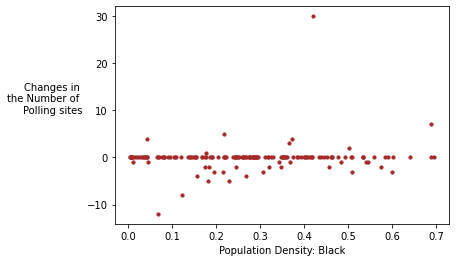

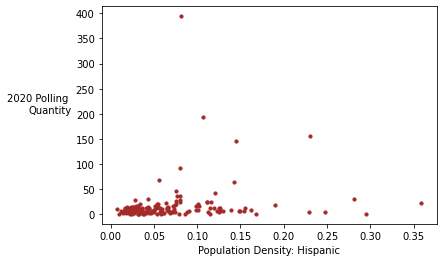

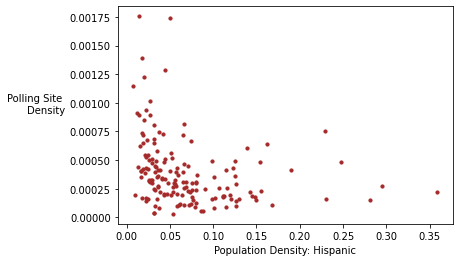

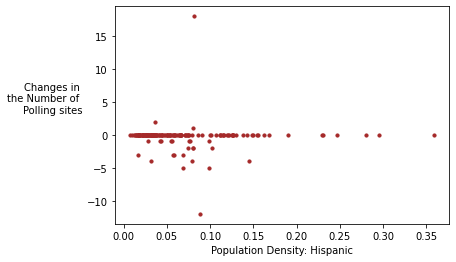

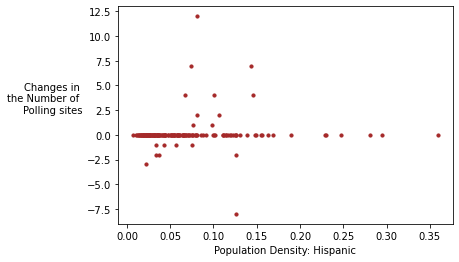

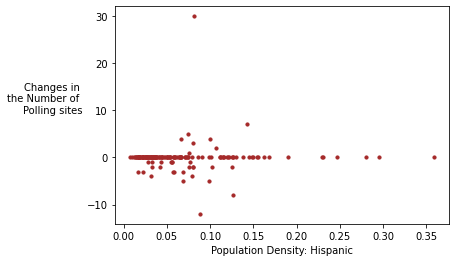

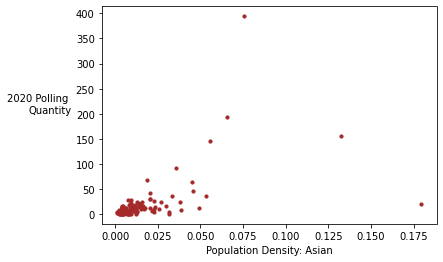

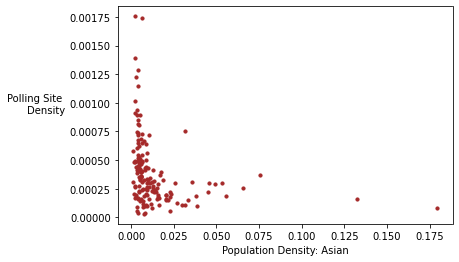

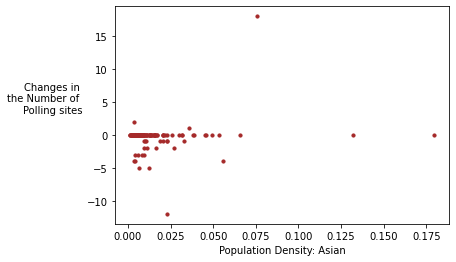

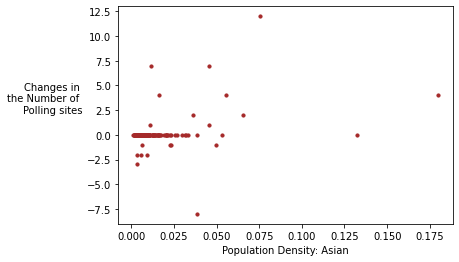

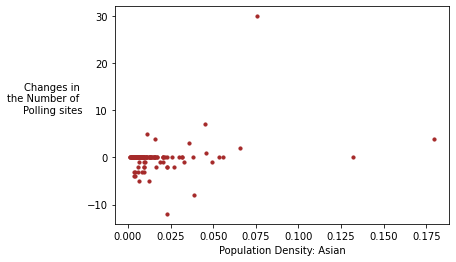

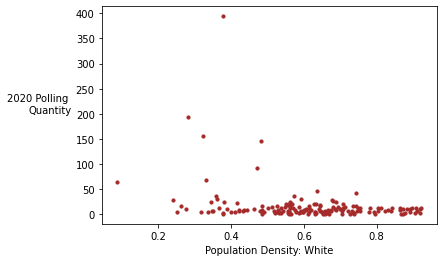

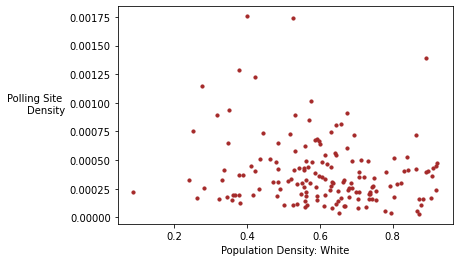

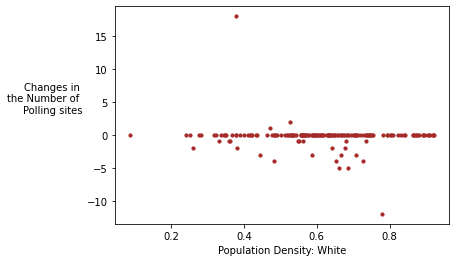

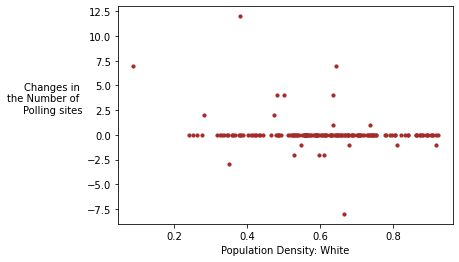

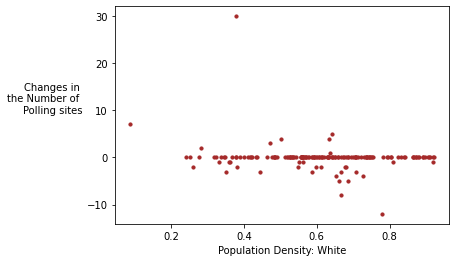

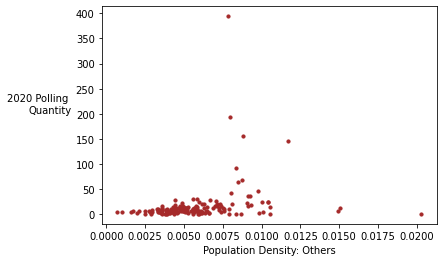

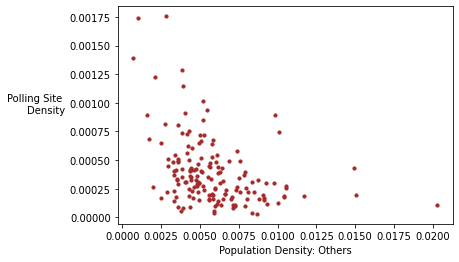

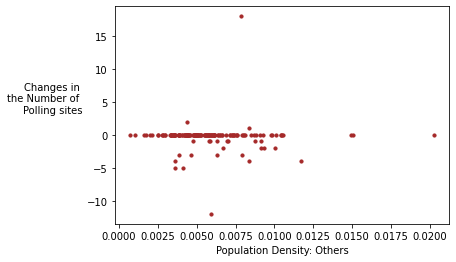

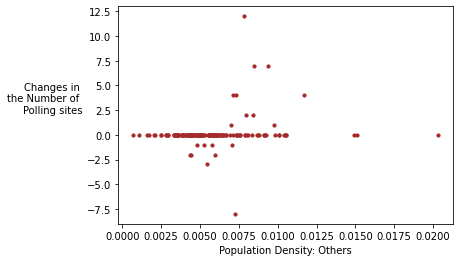

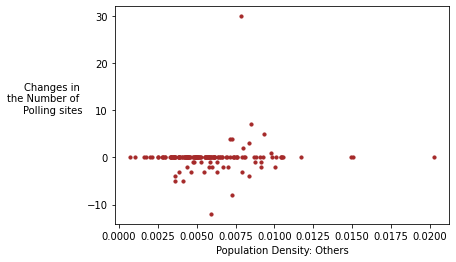

In [33]:
race = ['White', 'Black', 'Hispanic', 'Asian', 'White', 'Others']
years = ['16-18', '18-20', '16-20']

for i in race:
    scatterplot_quantity(i)
    scatterplot_density(i)
    for j in years:
        scatterplot_changes(i, j)